<!---
Latex Macros
-->
$$
\newcommand{\bar}{\,|\,}
\newcommand{\Xs}{\mathcal{X}}
\newcommand{\Ys}{\mathcal{Y}}
\newcommand{\y}{\mathbf{y}}
\newcommand{\weights}{\mathbf{w}}
\newcommand{\balpha}{\boldsymbol{\alpha}}
\newcommand{\bbeta}{\boldsymbol{\beta}}
\newcommand{\aligns}{\mathbf{a}}
\newcommand{\align}{a}
\newcommand{\source}{\mathbf{s}}
\newcommand{\target}{\mathbf{t}}
\newcommand{\ssource}{s}
\newcommand{\starget}{t}
\newcommand{\repr}{\mathbf{f}}
\newcommand{\repry}{\mathbf{g}}
\newcommand{\x}{\mathbf{x}}
\newcommand{\prob}{p}
\newcommand{\vocab}{V}
\newcommand{\params}{\boldsymbol{\theta}}
\newcommand{\param}{\theta}
\DeclareMathOperator{\perplexity}{PP}
\DeclareMathOperator{\argmax}{argmax}
\DeclareMathOperator{\argmin}{argmin}
\newcommand{\train}{\mathcal{D}}
\newcommand{\counts}[2]{\#_{#1}(#2) }
\newcommand{\length}[1]{\text{length}(#1) }
\newcommand{\indi}{\mathbb{I}}
$$

# Assignment 3

## Introduction

In the last assignment, you will apply deep learning methods to solve a particular story understanding problem. Automatic understanding of stories is an important task in natural language understanding [[1]](http://anthology.aclweb.org/D/D13/D13-1020.pdf). Specifically, you will develop a model that given a sequence of sentences learns to sort these sentence in order to yield a coherent story [[2]](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/06/short-commonsense-stories.pdf). This sounds (and to an extent is) trivial for humans, however it is quite a difficult task for machines as it involves commonsense knowledge and temporal understanding.

## Goal

You are given a dataset of 45502 instances, each consisting of 5 sentences. Your system needs to ouput a sequence of numbers which represent the predicted order of these sentences. For example, given a story:

    He went to the store.
    He found a lamp he liked.
    He bought the lamp.
    Jan decided to get a new lamp.
    Jan's lamp broke.

your system needs to provide an answer in the following form:

    2	3	4	1	0

where the numbers correspond to the zero-based index of each sentence in the correctly ordered story. So "`2`" for "`He went to the store.`" means that this sentence should come 3rd in the correctly ordered target story. In this particular example, this order of indices corresponds to the following target story:

    Jan's lamp broke.
    Jan decided to get a new lamp.
    He went to the store.
    He found a lamp he liked.
    He bought the lamp.

## Resources

To develop your model(s), we provide a training and a development datasets. The test dataset will be held out, and we will use it to evaluate your models. The test set is coming from the same task distribution, and you don't need to expect drastic changes in it.

You will use [TensorFlow](https://www.tensorflow.org/) to build a deep learning model for the task. We provide a very crude system which solves the task with a low accuracy, and a set of additional functions you will have to use to save and load the model you create so that we can run it.

As we have to run the notebooks of each submission, and as deep learning models take long time to train, your notebook **NEEDS** to conform to the following requirements:
* You **NEED** to run your parameter optimisation offline, and provide your final model saved by using the provided function
* The maximum size of a zip file you can upload to moodle is 160MB. We will **NOT** allow submissions larger than that.
* We do not have time to train your models from scratch! You **NEED** to provide the full code you used for the training of your model, but by all means you **CANNOT** call the training method in the notebook you will send to us.
* We will run these notebooks automatically. If your notebook runs the training procedure, in addition to loading the model, and we need to edit your code to stop the training, you will be penalised with **-20 points**.
* If you do not provide a pretrained model, and rely on training your model on our machines, you will get **0 points**.
* Your submissions will be tested on the stat-nlp-book Docker image to ensure that it does not have any dependencies outside of those that we provide. If your submission fails to adhere to this requirement, you will get **0 points**.

Running time and memory issues:
* We have tested a possible solution on a mid-2014 MacBook Pro, and a few epochs of the model run in less than 3min. Thus it is possible to train a model on the data in reasonable time. However, be aware that you will need to run these models many times over, for a larger number of epochs (more elaborate models, trained on much larger datasets can train for weeks! However, this shouldn't be the case here.). If you find training times too long for your development cycle you can reduce the training set size. Once you have found a good solution you can increase the size again. Caveat: model parameters tuned on a smaller dataset may not be optimal for a larger training set.
* In addition to this, as your submission is capped by size, feel free to experiment with different model sizes, numeric values of different precisions, filtering the vocabulary size, downscaling some vectors, etc.

## Hints

A non-exhaustive list of things you might want to give a try:
- better tokenization
- experiment with pre-trained word representations such as [word2vec](https://code.google.com/archive/p/word2vec/), or [GloVe](http://nlp.stanford.edu/projects/glove/). Be aware that these representations might take a lot of parameters in your model. Be sure you use only the words you expect in the training/dev set and account for OOV words. When saving the model parameters, pre-rained word embeddings can simply be used in the word embedding matrix of your model. As said, make sure that this word embedding matrix does not contain all of word2vec or GloVe. Your submission is limited, and we will not allow uploading nor using the whole representations set (up to 3GB!)
- reduced sizes of word representations
- bucketing and batching (our implementation is deliberately not a good one!)
  - make sure to draw random batches from the data! (we do not provide this in our code!)
- better models:
  - stacked RNNs (see tf.contrib.rnn.MultiRNNCell)
  - bi-directional RNNs
  - attention
  - word-by-word attention
  - conditional encoding
  - get model inspirations from papers on [nlp.stanford.edu/projects/snli/](nlp.stanford.edu/projects/snli/)
  - sequence-to-sequence encoder-decode architecture for producing the right ordering
- better training procedure:
  - different training algorithms
  - dropout on the input and output embeddings (see tf.nn.dropout)
  - L2 regularization (see tf.nn.l2_loss)
  - gradient clipping (see tf.clip_by_value or tf.clip_by_norm)
- model selection:
  - early stopping
- hyper-parameter optimization (e.g. random search or grid search (expensive!))
    - initial learning rate
    - dropout probability
    - input and output size
    - L2 regularization
    - gradient clipping value
    - batch size
    - ...
- post-processing
  - for incorporating consistency constraints

## Setup Instructions
It is important that this file is placed in the **correct directory**. It will not run otherwise. The correct directory is

    DIRECTORY_OF_YOUR_BOOK/assignments/2017/assignment3/problem/group_X/
    
where `DIRECTORY_OF_YOUR_BOOK` is a placeholder for the directory you downloaded the book to, and in `X` in `group_X` contains the number of your group.

After you placed it there, **rename the notebook file** to `group_X.ipynb`.

The notebook is pre-set to save models in

    DIRECTORY_OF_YOUR_BOOK/assignments/2017/assignment3/problem/group_X/model/

Be sure not to tinker with that directory - we expect your submission to contain a `model` subdirectory with a single saved model! 
The saving procedure might overwrite the latest save, or not. Make sure you understand what it does, and upload only a single model! (for more details check tf.train.Saver)

## General Instructions
This notebook will be used by you to provide your solution, and by us to both assess your solution and enter your marks. It contains three types of sections:

1. **Setup** Sections: these sections set up code and resources for assessment. **Do not edit, move nor copy these cells**.
2. **Assessment** Sections: these sections are used for both evaluating the output of your code, and for markers to enter their marks. **Do not edit, move, nor copy these cells**.
3. **Task** Sections: these sections require your solutions. They may contain stub code, and you are expected to edit this code. For free text answers simply edit the markdown field.  

**If you edit, move or copy any of the setup, assessments and mark cells, you will be penalised with -20 points**.

Note that you are free to **create additional notebook cells** within a task section. 

Please **do not share** this assignment nor the dataset publicly, by uploading it online, emailing it to friends etc.

## Submission Instructions

To submit your solution:

* Make sure that your solution is fully contained in this notebook. Make sure you do not use any additional files other than your saved model.
* Make sure that your solution runs linearly from start to end (no execution hops). We will run your notebook in that order.
* **Before you submit, make sure your submission is tested on the stat-nlp-book Docker setup to ensure that it does not have any dependencies outside of those that we provide. If your submission fails to adhere to this requirement, you will get 0 points**.
* **If running your notebook produces a trivially fixable error that we spot, we will correct it and penalise you with -20 points. Otherwise you will get 0 points for that solution.**
* **Rename this notebook to your `group_X`** (where `X` is the number of your group), and adhere to the directory structure requirements, if you have not already done so. ** Failure to do so will result in -1 point.**
* Download the notebook in Jupyter via *File -> Download as -> Notebook (.ipynb)*.
* Your submission should be a zip file containing the `group_X` directory, containing `group_X.ipynb` notebook, and the `model` directory with the saved model
* Upload that file to the Moodle submission site.

## <font color='green'>Setup 1</font>: Load Libraries
This cell loads libraries important for evaluation and assessment of your model. **Do not change, move or copy it.**

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
%matplotlib inline
#! SETUP 1 - DO NOT CHANGE, MOVE NOR COPY
import sys, os
_snlp_book_dir = "../../../../../"
sys.path.append(_snlp_book_dir)
# docker image contains tensorflow 0.10.0rc0. We will support execution of only that version!
import statnlpbook.nn as nn

import tensorflow as tf
import numpy as np
import tensorflow.contrib as keras


## <font color='green'>Setup 2</font>: Load Training Data

This cell loads the training data. **Do not edit the next cell, nor copy/duplicate it**. Instead refer to the variables in your own code, and slice and dice them as you see fit (but do not change their values). 
For example, no one stops you from introducing, in the corresponding task section, `my_train` and `my_dev` variables that split the data into different folds.   

In [2]:
#! SETUP 2 - DO NOT CHANGE, MOVE NOR COPY
data_path = _snlp_book_dir + "data/nn/"
data_train = nn.load_corpus(data_path + "train.tsv")
data_dev = nn.load_corpus(data_path + "dev.tsv")
assert(len(data_train) == 45502)

### Data Structures

Notice that the data is loaded from tab-separated files. The files are easy to read, and we provide the loading functions that load it into a simple data structure. Feel free to check details of the loading.

The data structure at hand is an array of dictionaries, each containing a `story` and the `order` entry. `story` is a list of strings, and `order` is a list of integer indices:

In [3]:
data_train[1]

{'order': [1, 0, 3, 4, 2],
 'story': ["She didn't have a bike of her own.",
  'Carrie had just learned how to ride a bike.',
  'She got nervous on a hill and crashed into a wall.',
  'The bike frame bent and Carrie got a deep gash on her leg.',
  "Carrie would sneak rides on her sister's bike."]}

## <font color='blue'>Task 1</font>: Model implementation

Your primary task in this assignment is to implement a model that produces the right order of the sentences in the dataset.

### Preprocessing pipeline

First, we construct a preprocessing pipeline, in our case `pipeline` function which takes care of:
- out-of-vocabulary words
- building a vocabulary (on the train set), and applying the same unaltered vocabulary on other sets (dev and test)
- making sure that the length of input is the same for the train and dev/test sets (for fixed-sized models)

You are free (and encouraged!) to do your own input processing function. Should you experiment with recurrent neural networks, you will find that you will need to do so.

In [4]:
def loadWord2Vec(filename):
    vocab = {}
    embd = []
    file = open(filename,'r')
    for line in file.readlines():
        row = line.strip().split(' ')
        for i,token in enumerate(row):
            if i == 0:
                vocab[row[i]] = len(vocab)
            else:
                embd.append(float(row[i]))
    print('Successfully load.')
    file.close()    
    return vocab,embd

In [5]:
import re
def tokenize(input):
    token = re.compile("[\w]+(?=n't)|n't|'s|\'m|\'ll|[\w]+|[.?!;,:]")
    tokens = token.findall(input)
    return tokens

In [6]:
def pipeline2(data,vocab=None,embd=None,max_sent_len_=None):
    is_ext_vocab = True
    if vocab is None and embd is None: 
        is_ext_vocab = False
        #load word2vect
        filename = 'word2vec.txt'
        vocab, vec = loadWord2Vec(filename)
        embd = np.array(vec,dtype=np.float32)
        embd = np.reshape(embd,(len(vocab),50))
    
    max_sent_len = -1
    data_sentences = []
    data_orders = []
    full_length = []
    for instance in data:
        sents = []
        story_length = []
        for sentence in instance['story']:
            sent = []
            tokenized = tokenize(sentence)
            temp_length = np.shape(tokenized)[0]
            for token in tokenized:
                token = token.lower()
                if not is_ext_vocab: #trainning set
                    token_id = vocab[token]
                elif token not in vocab:
                    token_id = vocab['<OOV>']
                else:
                    token_id = vocab[token]                 
                sent.append(token_id)
            if len(sent) > max_sent_len:
                max_sent_len = len(sent)
            sents.append(sent)
            story_length.append(temp_length)
        data_sentences.append(sents)
        data_orders.append(instance['order'])
        full_length.append(story_length)

    if max_sent_len_ is not None:
        max_sent_len = max_sent_len_
    out_sentences = np.full([len(data_sentences), 5, max_sent_len], vocab['<PAD>'], dtype=np.int32)

    for i, elem in enumerate(data_sentences):
        for j, sent in enumerate(elem):
            out_sentences[i, j, 0:len(sent)] = sent

    out_orders = np.array(data_orders, dtype=np.int32)
    #full_length = np.reshape(full_length,[-1])
    full_length = np.asmatrix(full_length)
    return out_sentences, out_orders, vocab, embd, full_length

In [7]:
train_stories, train_orders, vocab, embd, train_length= pipeline2(data_train)

Successfully load.


You need to make sure that the `pipeline` function returns the necessary data for your computational graph feed - the required inputs in this case, as we will call this function to process your dev and test data. If you do not make sure that the same pipeline applied to the train set is applied to other datasets, your model may not work with that data!

In [8]:
#Word Embedding
max_sent_len = train_stories.shape[2]
dev_stories, dev_orders, _, _ ,dev_length= pipeline2(data_dev, vocab=vocab, max_sent_len_=max_sent_len)

You can take a look at the result of the `pipeline` with the `show_data_instance` function to make sure that your data loaded correctly:

In [9]:
nn.show_data_instance(dev_stories, dev_orders, vocab, 155)

Input:
 Story:
  the manager decided to offer john the job .
  during the interview he was very talkative and <OOV> .
  he went to the interview very prepared and nicely dressed .
  john was excited to have a job interview .
  the manager of the company was really impressed by john 's comments .
 Order:
  [4 2 1 0 3]

Desired story:
  john was excited to have a job interview .
  he went to the interview very prepared and nicely dressed .
  during the interview he was very talkative and <OOV> .
  the manager of the company was really impressed by john 's comments .
  the manager decided to offer john the job .


### Model

The model we provide is a rudimentary, non-optimised model that essentially represents every word in a sentence with a fixed vector, sums these vectors up (per sentence) and puts a softmax at the end which aims to guess the order of sentences independently.

First we define the model parameters:

In [10]:
#def generate_hyperparameters():
#    # Randomly choose values for the hyperparameters.
#    return {"learning_rate": 10 ** np.random.uniform(-5, 0),
#            "batch_size_rand": np.random.randint(1, 100),
#            "dropout": np.random.uniform(0, 1),
#            "hidden_unit_1": np.random.randint(1, 100),
#            "hidden_unit_2": np.random.randint(1, 100)}

In [11]:
#training parameter
#num_hidden = 128
target_size = 5
vocab_size = len(vocab)
input_size = 50
#timesteps = 5
#num_layers = 2

and then we define the model

In [12]:
#param = generate_hyperparameters()

#Best Parameters
learning_rate = 0.0015
batch_size_rand = 17
dropout = 0.03020300392066011
hidden_unit_1 = 68
hidden_unit_2 = 30

In [13]:
tf.reset_default_graph()
#creat tensor holder
story = tf.placeholder(tf.int32, [None,None,None],"story")
order = tf.placeholder(tf.int32, [None,None],"order")
length = tf.placeholder(tf.int64, [None, None], "sentence_length") #[batch_size x 5]

#weights = {
#    'out': tf.Variable(tf.random_normal([num_hidden, target_size]),dtype=tf.float32)
#}
#biases = {
#    'out': tf.Variable(tf.random_normal([target_size]),dtype=tf.float32)
#}

batch_size = tf.shape(story)[0]
sentences = [tf.reshape(x, [batch_size, -1]) for x in tf.split(axis=1, num_or_size_splits=5, value=story)]
#initializer = tf.random_uniform_initializer(-0.1, 0.1)
#embeddings = tf.get_variable("W", [vocab_size, input_size], initializer=initializer)

embeddings = tf.constant(embd)
sentences_embedded = [tf.nn.embedding_lookup(embeddings, sentence)    # 5 x batch_size x max_length x input_size
                    for sentence in sentences]
# hs = [tf.reduce_sum(sentence, 1) for sentence in sentences_embedded]
hs = []
#cell = tf.contrib.rnn.BasicLSTMCell(num_hidden, forget_bias=1.0,state_is_tuple=True)
hidden_units = [hidden_unit_1,hidden_unit_2]
rnn_layers = [tf.contrib.rnn.LSTMCell(size, activation= tf.nn.tanh) for size in hidden_units]
cell = tf.contrib.rnn.MultiRNNCell(rnn_layers, state_is_tuple=True)
cell = tf.contrib.rnn.DropoutWrapper(
      cell, output_keep_prob=dropout)


i = 0
for batch in sentences_embedded:
    output,final_state = tf.nn.dynamic_rnn(cell,batch,sequence_length = length[:,i],dtype=tf.float32)
    #output, _ = tf.nn.bidirectional_dynamic_rnn(cell_fw=cell,cell_bw=cell,inputs = batch, 
    #                                                      sequence_length= length[:,1], dtype = tf.float32)

    hs.append(final_state[-1].h)
    #hs.append(tf.matmul(final_state.h, weights['out']) + biases['out'])
    i+=1
# the size of hs [5,batch_size,5]

h = tf.concat(axis=1, values=hs)    # [batch_size x 5*input_size]
h = tf.reshape(h, [batch_size, 5*hidden_units[-1]])
logits_flat = tf.contrib.layers.linear(h, 5 * target_size)    # [batch_size x 5*target_size]
logits = tf.reshape(logits_flat, [-1, 5, target_size])        # [batch_size x 5 x target_size]
#logits = tf.transpose(hs,perm=[1,0,2])
# # # loss 
loss = tf.reduce_sum(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=order))

#beta = 0.1
#regularizers = tf.nn.l2_loss(weights['out'])

#loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
#    logits=logits, labels=order))

#loss = loss + beta * regularizers


# prediction function
unpacked_logits = [tensor for tensor in tf.unstack(logits, axis=1)]
softmaxes = [tf.nn.softmax(tensor) for tensor in unpacked_logits]
softmaxed_logits = tf.stack(softmaxes, axis=1)
predict = tf.arg_max(softmaxed_logits, 2)
#opt_op = tf.train.AdamOptimizer(0.1).minimize(loss)

max_gradient_norm = 1

# Calculate and clip gradients
params = tf.trainable_variables()
gradients = tf.gradients(loss, params)
clipped_gradients, _ = tf.clip_by_global_norm(
gradients, max_gradient_norm)

# Optimization
#optimizer = tf.train.AdamOptimizer(0.0015)
optimizer = tf.train.RMSPropOptimizer(0.0015)
update_step = optimizer.apply_gradients(
    zip(clipped_gradients, params))
opt_op = optimizer.minimize(loss)

In [14]:
"""
BATCH_SIZE = batch_size_rand
indicator = 0
print(param)
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    n = train_stories.shape[0]

    for epoch in range(100):
        #BATCH_SIZE = 
        print('----- Epoch', epoch, '-----')
        total_loss = 0
        idx = np.random.permutation(train_stories.shape[0])
        for i in range(n // BATCH_SIZE):
            inst_story = train_stories[idx[i * BATCH_SIZE: (i + 1) * BATCH_SIZE]]
            inst_order = train_orders[idx[i * BATCH_SIZE: (i + 1) * BATCH_SIZE]]
            inst_length = train_length[idx[i * BATCH_SIZE: (i + 1) * BATCH_SIZE]]
            feed_dict = {story: inst_story, order: inst_order, length: inst_length}
            _, current_loss = sess.run([opt_op, loss], feed_dict=feed_dict)
            total_loss += current_loss

        print(' Train loss:', total_loss / n)

        train_feed_dict = {story: train_stories, order: train_orders, length: train_length}
        train_predicted = sess.run(predict, feed_dict=train_feed_dict)
        train_accuracy = nn.calculate_accuracy(train_orders, train_predicted)
        print(' Train accuracy:', train_accuracy)

        dev_feed_dict = {story: dev_stories, order: dev_orders,length:dev_length}
        dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)
        dev_accuracy = nn.calculate_accuracy(dev_orders, dev_predicted)
        print(' Dev accuracy:', dev_accuracy)

        if dev_accuracy > indicator:
            loc1_save_model(sess)
            indicator = dev_accuracy

    #nn.save_model(sess)
"""

"\nBATCH_SIZE = batch_size_rand\nindicator = 0\nprint(param)\nwith tf.Session() as sess:\n    sess.run(tf.initialize_all_variables())\n    n = train_stories.shape[0]\n\n    for epoch in range(100):\n        #BATCH_SIZE = \n        print('----- Epoch', epoch, '-----')\n        total_loss = 0\n        idx = np.random.permutation(train_stories.shape[0])\n        for i in range(n // BATCH_SIZE):\n            inst_story = train_stories[idx[i * BATCH_SIZE: (i + 1) * BATCH_SIZE]]\n            inst_order = train_orders[idx[i * BATCH_SIZE: (i + 1) * BATCH_SIZE]]\n            inst_length = train_length[idx[i * BATCH_SIZE: (i + 1) * BATCH_SIZE]]\n            feed_dict = {story: inst_story, order: inst_order, length: inst_length}\n            _, current_loss = sess.run([opt_op, loss], feed_dict=feed_dict)\n            total_loss += current_loss\n\n        print(' Train loss:', total_loss / n)\n\n        train_feed_dict = {story: train_stories, order: train_orders, length: train_length}\n        tr

We built our model, together with the loss and the prediction function, all we are left with now is to build an optimiser on the loss:

### Model training 

We defined the preprocessing pipeline, set the model up, so we can finally train the model

Change the following lines so that they construct the test set in the same way you constructed the dev set in the code above. We will insert the test set instead of the dev set here. **`test_feed_dict` variable must stay named the same**.

In [15]:
# LOAD THE DATA
data_test = nn.load_corpus(data_path + "test.tsv")
# make sure you process this with the same pipeline as you processed your dev set
test_stories, test_orders, _, _, test_length = pipeline2(data_test, vocab=vocab, max_sent_len_=max_sent_len)

# THIS VARIABLE MUST BE NAMED `test_feed_dict`
test_feed_dict = {story: test_stories, order: test_orders, length: test_length}

The following code loads your model, computes accuracy, and exports the result. **DO NOT** change this code.

In [19]:
#! ASSESSMENT 1 - DO NOT CHANGE, MOVE NOR COPY
with tf.Session() as sess:
    # LOAD THE MODEL
    saver = tf.train.Saver()
    saver.restore(sess, './model/model.checkpoint')
    
    # RUN TEST SET EVALUATION
    dev_predicted = sess.run(predict, feed_dict=test_feed_dict)
    dev_accuracy = nn.calculate_accuracy(test_orders, dev_predicted)

dev_accuracy

0.53661143773383213

In [17]:
from sklearn.metrics import precision_recall_fscore_support
sentence_pre = []
sentence_act = []
acc = []
temp = []
for i in range(5):
    sentence_pre.append(dev_predicted[:,i])
    sentence_act.append(dev_orders[:,i])
    acc.append(nn.calculate_accuracy(sentence_act[i], sentence_pre[i])*5)
    temp.append(precision_recall_fscore_support(dev_orders[:,i],dev_predicted[:,i],average='weighted'))
    
print (acc,temp)

[0.20737573490112238, 0.19134152859433456, 0.19134152859433456, 0.19454836985569213, 0.19935863174772847] [(0.20664763157429164, 0.2073757349011224, 0.20640547155124295, None), (0.19274148427508647, 0.19134152859433459, 0.19141487921718556, None), (0.19153040267549501, 0.19134152859433459, 0.19103500591267869, None), (0.19897353765916276, 0.19454836985569215, 0.19470491003385346, None), (0.19977296087565566, 0.1993586317477285, 0.19909376772248366, None)]


Confusion matrix, without normalization
[[380 375 306 367 443]
 [415 375 331 363 387]
 [381 420 332 351 387]
 [417 397 284 378 395]
 [386 431 353 325 376]]


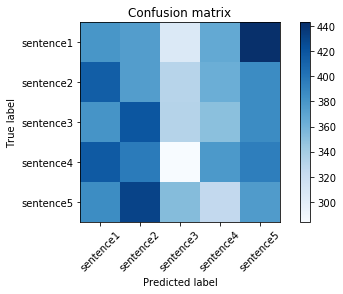

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

target_names = ['sentence1','sentence2','sentence3','sentence4','sentence5']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
y_true = np.reshape(dev_orders,1871*5) 
y_pred = np.reshape(dev_predicted,1871*5)
cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Description

The process of the assignment is consist of four parts. The first part is to pre-process our input data. The second part is to select and build a good model to predict the sequence of sentences. The third part is to tune the parameter and use some techniques to improve the performance of the model.The last part is to make comparison with the original model and do error analysis.

# Pre-process the data:

**1.tokenization**:
We implement a different tokenization instead of just split the word by a space such as "n't", "'s" and full stop(".").

**2.apply pre-train word2vec word embedding**:
In order the vectorize sentences so that they can be inputs of the model. Firstly, we vectorize the word. In the assignment, we use the pre-trained word representation of Glove. Only words appeared in the training set are included in the model.

**3.modify pipeline function**:
When reconstructing the pipeline function, we had tried some methods. First we tried to use a vector to represent a sentence. In that case each training sample will be one vector instead of a sequence of data. In our assignment, this is done by summing up all the words in a sentence and then use the average value as the input vector. But later, we found some critical disadvantage of this method: the model cannot learn the order information of the data, which means that the model will also fails to learn the semantic features of data set because different order of words have different meaning.
Therefore, we tried another way to reconstruct the pipeline function which is very similar to the original one. The difference is that we generate new vocab, embeddings and also the actual length of sentences.

# Model building:

Firstly, we did some change to the input data. We add pre-train embedding instead of initializing them without meaningful and trained them. Besides that , we included the actual length of each sentence (this can be used in dynamic rnn training ). 
Then, we made some change to the form of input data. The original form of input data of  teacher’s model is an array with three dimentions (5xbatch_sizexinput_size) which the sentence representation is a vector of the average value of all words in the sentence. Because we use dynamic rnn which requires the range of the data so we add other input whihc is a length of each sentence. The second step is to construct the lstm model. We built  two lstm cell and stack them using a multirnn cell. In case of overfitting , we use dropwrapper and set the passing probability to 0.0302 (from random search). And then we put the multirnn cell into the dynamic rnn running algorithm and fed the 5 sentences step by step which means that the size of input of each time is [batch_size, max_length,input_size]. And we only take the last state of the output which means that we only need the output of the last word of each sentence. And then we put them into a fully-connected output layer with activation function of sigmoid. Next, we use the same loss and prediction function as teacher did. And then, after experiencing different optimizer, we chose to use RMSPropOptimizer and set the leaning rate to 0.0015. 


**Other models we tried**:
Initially, we tried to use only one lstmcell to build the model and put all 5 sentences's representation of all batch_size data toin to model one time, only use outweight and outbias to get the output from each nodes in the cell. This model can get a accuracy of about 52~53.Besites that we tried to use bi-directional deep neural network that maintains two hidden layers of GRU cell or LSTM cell, one for the left-to-right propagation and another for the right-to-left propagation. In this way, we can not only make prediction based on previous words, but also based on future words. However, maintaining two hidden layers at any time, this network consumes twice as much memory space for its weight and bias parameters while its accuracy is lesser than that by using MultiRNNCell. The last model we tried was seq2seq, we implemented it by using the package of keras as there was little time left so we only build a basic seq2seq model which can get us a dev accuracy of about 53~54.

**Better trainning procedure and tuning of hyparameters**:
By using dropwrapper on the MultiRnncell and gradient cilpping on the different optimiser, we found they can help to increase the accuracy a little bit. Beside this, it is also important to tune a good combination of hyparameters. We thought about to use grid search but it is quite expensive so we finally decided to random search. We defined a random search function of output of batch_size, learning rate , dropout probability and the hidden units of two lstm cell.This helped us a lot to find a good combination of hyparameters. Once we got about 55.2 of dev accuracy in the third epoch. We also use early stopping to get the better model.


## Comparison:
As we have mentioned detailedly above, let's make summary of the differences between our model and teacher's model.

**1.the input to the model**:
The input to the model of the orginal model is all 5 sentences representation of words of batch_size while our input to the model is word vector of each word in every sentence.As sentence representation will decrease information of words in a certain extent so the new input keeps every word's information and this can help improve accuracy.

**2.model change**:
The original model is too simple an we change it to MultiRnn which can keep the memory of former words. 

**3.model running algorithm**:
The orginal model running algorithm is static. Our model took the true length of each sentence and applied it to dynamic running algoritm. This help a lot to improve the accuracy.

**4.tranning algorithm**:
We have tried a lot of things which didn't provided in original model like l2 regularization (though we didn't use it eventually), gradient clipping, early stopping , choose random sample from the data, random search, dropout and so on.

## Error Analysis:
| Type | 1st sentence  | 2nd sentence | 3rd sentence  |4th sentence  |5th sentence  | total
|------|---|--|--|--|
| **Dev Accuracy** | 0.55478353821485837 |0.55585248530197762 |0.56814537680384825  |0.51950828433992524  |0.56173169428113312  |0.5520042757883485

| Type | 1st sentence  | 2nd sentence | 3rd sentence  |4th sentence  |5th sentence  | total
|------|---|--|--|--|
| **recall** | 0.55478353821485837 |0.55585248530197751 |0.56814537680384825  |0.51950828433992513  |0.56173169428113312 |0.5520042757883485
| **precision** | 0.55170147928577773 |0.54745604991651109 |0.55573558119283739  |0.51385747018039296  |0.55379027428018601  |0.544508170971141
| **f1 score** | 0.55286387421540029 |0.550304286941540 |0.56062259886380594  |0.5142538735085706  |0.55697811783787443 |0.5470045502734383



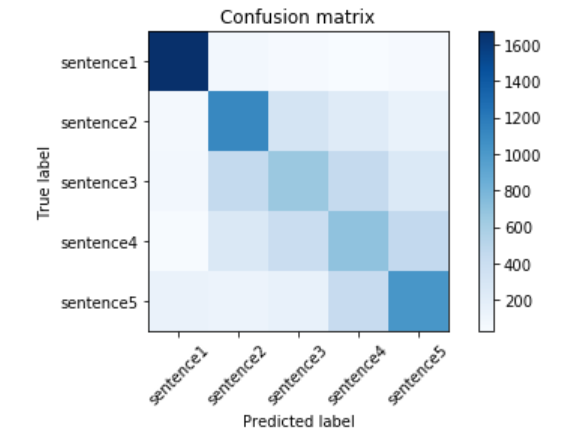

1. Precision
Sentence4 has the lowest precision: there are only about 51.4% of sentence4’s prediction are correct, while there are around 55% of other orders’ prediction are correct.
2.Recall
Among the 1871 sentences that actually ordered 4, we only successfully find 51.9% of them, while we can find 55% of the rest sentences that have other order.
3. F1 score
Combine this two indicators, the f1 score of 4th sentence is the worst among all orders, only about 0.51, while the rest are around 0.55.

The reason for low score of sentence4 and high score of sentence1 may be that there are some similar words within the story while there are specified indicator of the beginning of story.

From examining confusion matrix, we found some error that our model may make.
1.Our model tend to mislabel sentences3 and sentence4 to their neighbor order with nearly equal probability.There are about 900 sentences3 are predicted to be sentence2 and sentence4 with nearly equal number (450 each) and sentence4 have similar case, mislabelled 405 sentences4 to be sentence3 and 454 to sentence5. The reason may be that they have strong relationship between the nearby sentences so it is hard to detect the real order of them.
2.Our model seldom predicted sentences to be sentence3 (there are total 1588 prediction of sentence3 while there are almost 1950 predictions of other sentences). The reason may be that it is in the middle of story and it may contain some information about the future and the bi-direction may perform better at this case.

# Reference:
1.http://www.deeplearningbook.org/contents/mlp.html, Deep Feedforward Networks

2.Dzmitry Bahdanau, KyungHyun Cho Yoshua Bengio(2015).NEURAL MACHINE TRANSLATION BY JOINTLY LEARNING TO ALIGN AND TRANSLATE

3.Tom Hope, Yehezkel S. Resheff, Itay Lieder.Learning TensorFlow: A Guide to Building Deep Learning Systems

...WRITE YOUR DESCRIPTION HERE...